In [ ]:
# TODO:
# kmeans on data
# reduce dimensionality with pca, then t-sne
# https://distill.pub/2016/misread-tsne/

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/bhl

Mounted at /gdrive
/gdrive/MyDrive/bhl


In [8]:
import pandas as pd

final_train = pd.read_csv('final_train.csv')
df = final_train.drop(['Unnamed: 0', 'void()'], axis = 1)

In [9]:
print(len(df))
df = df.drop_duplicates()
df = df.dropna()
print(len(df))

11086
9513


In [ ]:
full = df.drop(['Activity', 'subject'], axis = 1)

In [60]:
# reduce dims PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
data_pca = pca.fit_transform(full)
print(pca.explained_variance_ratio_.cumsum())
print(len(pca.components_))
# feed tsne_df

[0.37675435 0.54244664 0.61358996 0.66547315 0.70104598 0.73181588
 0.76007439 0.78160955 0.80202227 0.82115726 0.83948259 0.85386637
 0.86663897 0.87837162 0.88674466 0.89425371 0.90041648 0.9061755
 0.91133441 0.91629741 0.92079287 0.92509593 0.92900864 0.9326231
 0.93570095 0.93847688 0.94085623 0.94305029 0.94515336 0.94719933
 0.94909803 0.95088565]
32


In [59]:
data_pca

array([[-4.81526120e+00,  2.02566198e+00, -1.36758542e+00, ...,
        -1.44466220e+00,  3.56385850e-01, -6.98401029e-01],
       [ 1.06979961e+01, -6.32936026e+00,  9.68183930e+00, ...,
         2.77799047e-01, -2.42946780e-01, -7.47434657e-02],
       [-9.00398230e+00,  4.76353952e+00, -4.50616650e+00, ...,
        -1.26495663e-01, -1.77465320e-01, -1.90736118e-01],
       ...,
       [-4.49445049e+00,  4.19602681e+00,  1.06527205e+00, ...,
         2.79518515e-01, -8.23351602e-01,  3.00126306e-01],
       [ 8.83093207e+00,  1.80411599e+01, -4.33810974e+00, ...,
        -4.17005316e-01,  5.90903357e-01, -1.19937884e-01],
       [ 5.63122474e+00,  4.10905172e+00, -4.40387707e+00, ...,
         6.59284394e-01, -1.10311297e-02,  1.67230370e+00]])

In [66]:
def tsne_df(perplexity, df,ax = None):
  from sklearn.manifold import TSNE as tsne

  embed = tsne(perplexity=perplexity).fit_transform(df)
  emdf = pd.DataFrame(embed)
  emdf['Activity'] = sub['Activity'].reset_index(drop = True).astype('category')
  import seaborn as sns
  if ax:
    ax = sns.scatterplot(ax = ax, x = 0, y = 1 , data = emdf, hue = 'Activity')
  else:
    ax = sns.scatterplot(x = 0, y = 1 , data = emdf, hue = 'Activity')
  #ax.legend_.remove()
  return ax

In [56]:
perpx = [10, 20, 30, 40, 50, 60]

def test_perpxs(df, perpx):
  import matplotlib.pyplot as plt
  fig, axs = plt.subplots(1, len(perpx), figsize = (24,8))
  for p, i in zip(perpx, range(len(perpx))):
    tsne_df(p, df, axs[i])
  return fig

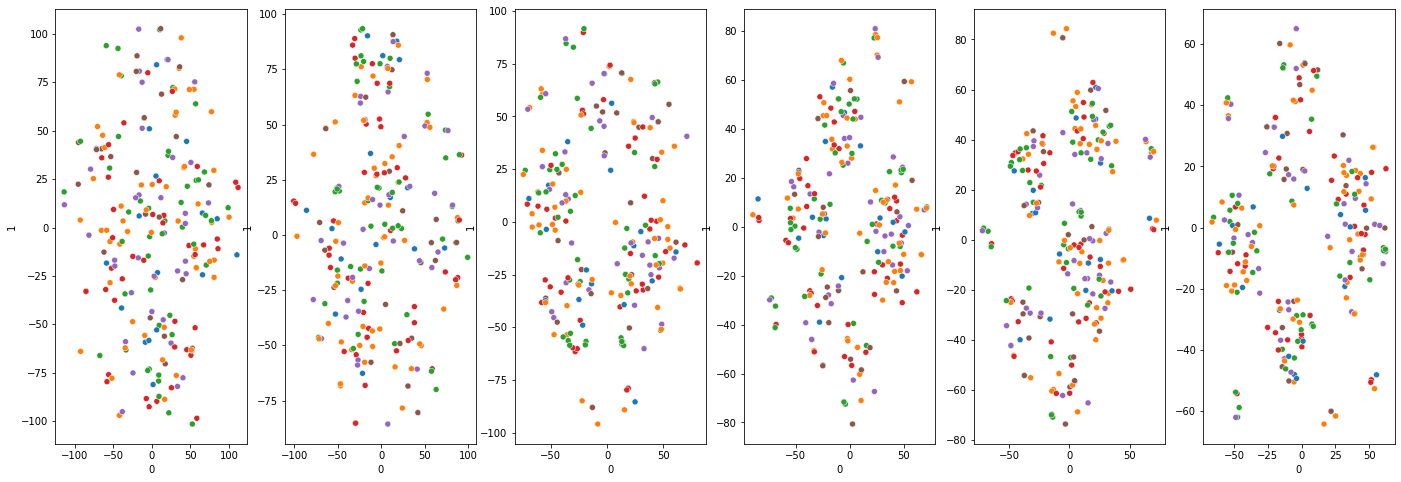

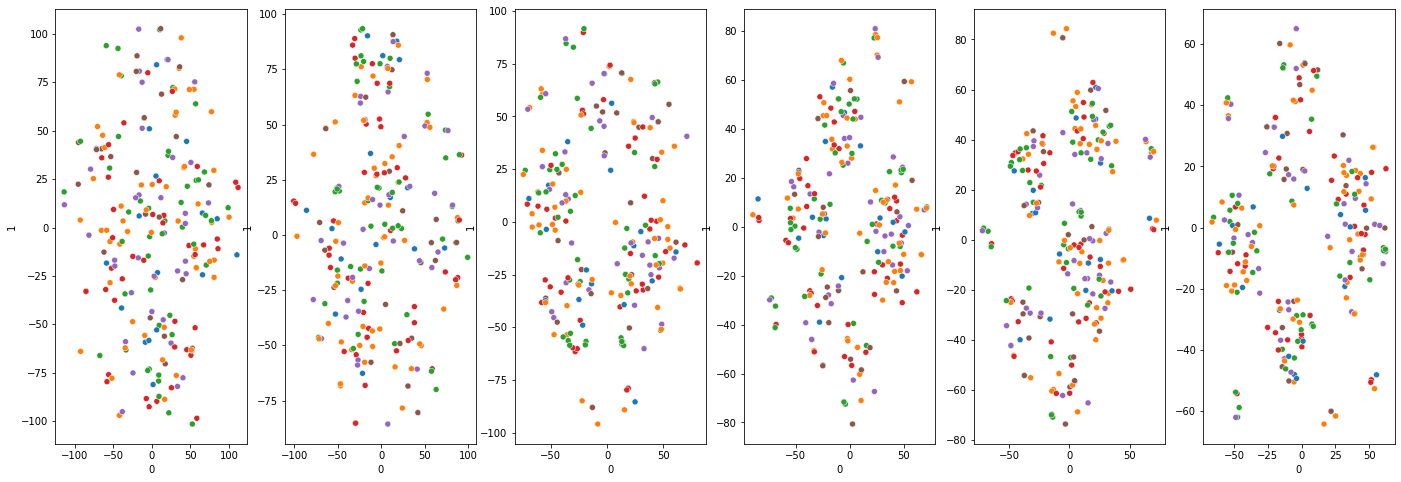

In [61]:
test_perpxs(data_pca, perpx)

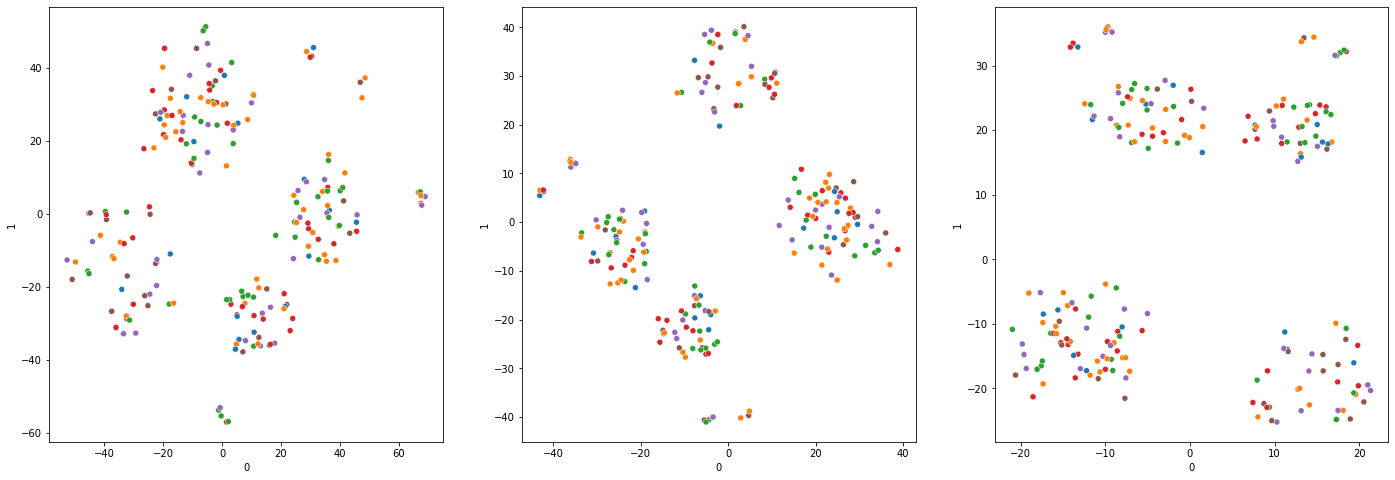

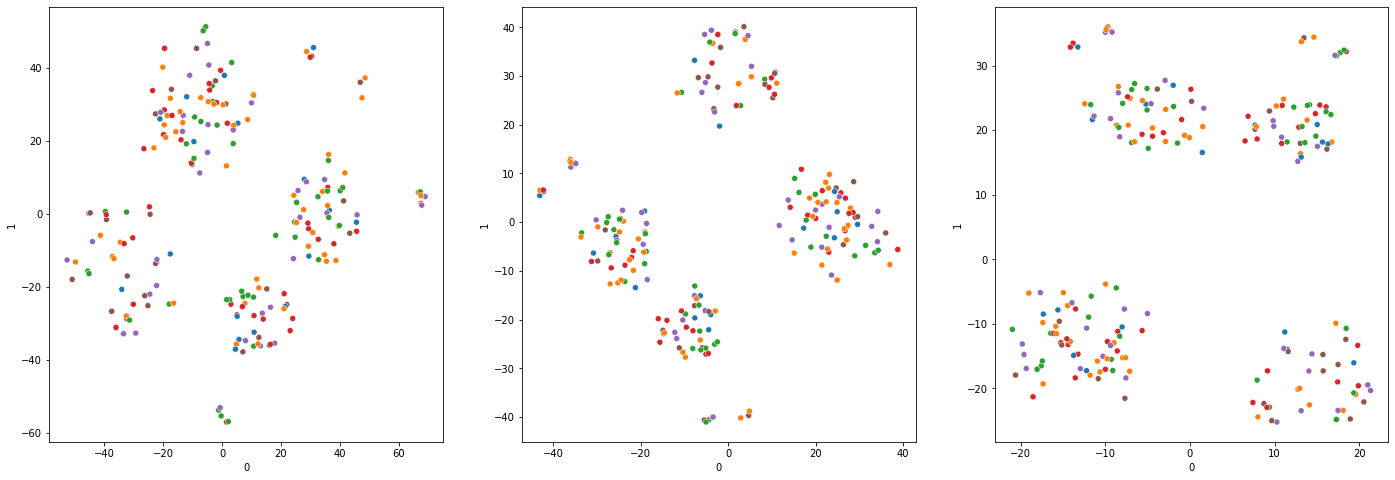

In [62]:
test_perpxs(data_pca, [100, 200, 300])

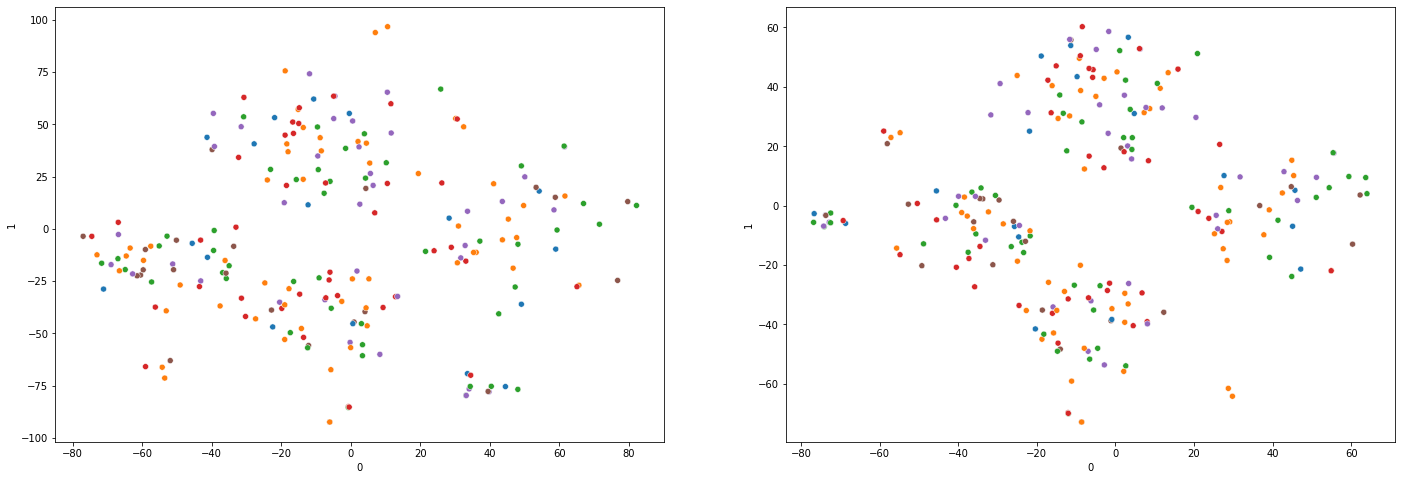

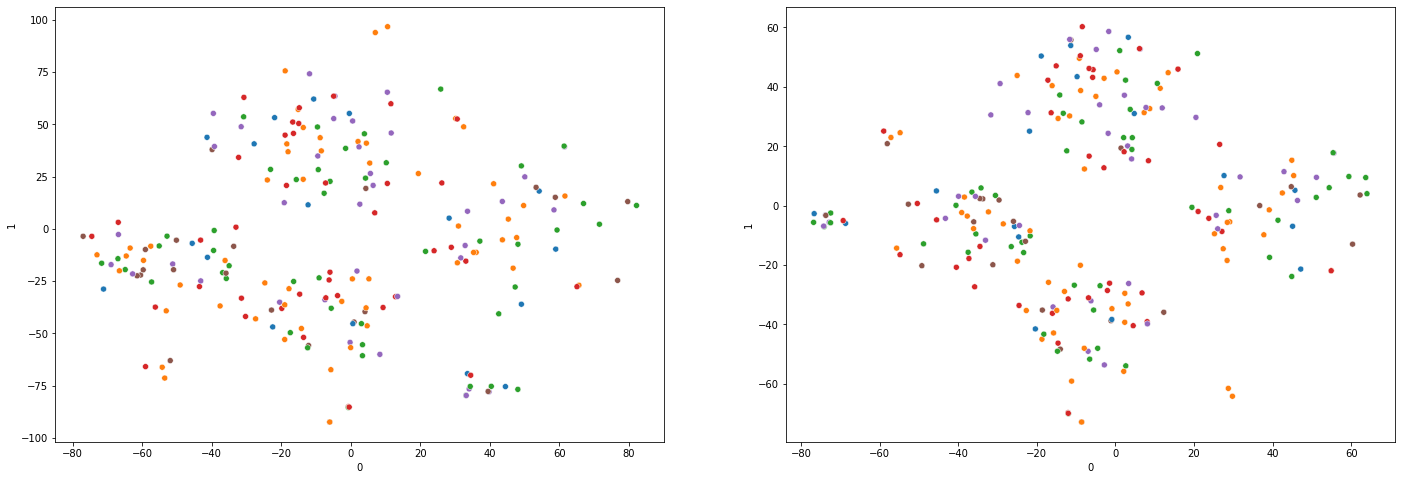

In [54]:
half = full.sample(frac = 0.5)

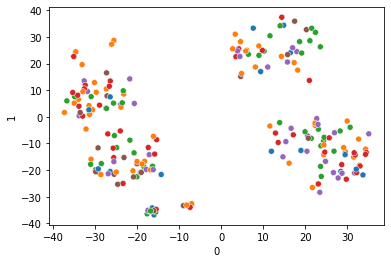

In [57]:
tsne_df(100, half)

222


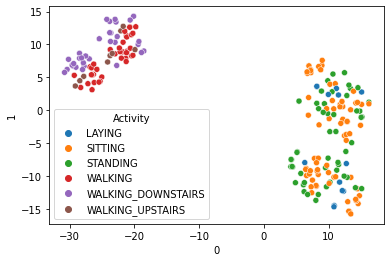

In [67]:
sub = df.query('subject == 5')
print(len(sub))
sub.head(3)
#sub.groupby('Activity').size().plot.bar()

tsne_df(30, sub.drop(['Activity', 'subject'], axis = 1))